In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('../data/melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
df['Car'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
13575    False
13576    False
13577    False
13578    False
13579    False
Name: Car, Length: 13580, dtype: bool

In [8]:
df[df['Car'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12221,Ascot Vale,132 The Parade,3,h,985000.0,S,Brad,3/09/2017,4.3,3032.0,...,1.0,NaN,245.0,91.0,1945.0,NaN,-37.77215,144.91144,Western Metropolitan,6567.0
12247,Brunswick East,18 Ethel St,2,h,1023000.0,S,Domain,3/09/2017,4.0,3057.0,...,1.0,NaN,154.0,76.0,1890.0,NaN,-37.77221,144.97537,Northern Metropolitan,5533.0
12259,Clifton Hill,34 Fenwick St,3,h,1436000.0,S,Jellis,3/09/2017,3.6,3068.0,...,2.0,NaN,123.0,128.0,1990.0,NaN,-37.78888,145.00036,Northern Metropolitan,2954.0
12320,Glen Waverley,19 Diamond Av,3,h,1370000.0,S,Fletchers,3/09/2017,16.7,3150.0,...,1.0,NaN,652.0,NaN,NaN,NaN,-37.87170,145.17267,Eastern Metropolitan,15321.0
12362,Newport,11 Collingwood Rd,4,h,1180000.0,PI,Williams,3/09/2017,6.2,3015.0,...,1.0,NaN,545.0,NaN,NaN,NaN,-37.84399,144.89125,Western Metropolitan,5498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13496,Moonee Ponds,46 Eglinton St,4,h,1525000.0,S,Nelson,26/08/2017,6.2,3039.0,...,3.0,NaN,233.0,NaN,NaN,NaN,-37.76884,144.91708,Western Metropolitan,6232.0
13508,North Melbourne,9 Erskine St,2,h,1080000.0,S,Jellis,26/08/2017,1.8,3051.0,...,1.0,NaN,100.0,67.0,1890.0,NaN,-37.79524,144.94642,Northern Metropolitan,6821.0
13522,Port Melbourne,201 Stokes St,2,h,1515000.0,SP,Marshall,26/08/2017,3.5,3207.0,...,2.0,NaN,197.0,NaN,NaN,NaN,-37.83754,144.93954,Southern Metropolitan,8648.0
13524,Prahran,17 Packington Pl,2,h,1365000.0,S,Jellis,26/08/2017,4.6,3181.0,...,1.0,NaN,206.0,100.0,1900.0,NaN,-37.85569,145.00522,Southern Metropolitan,7717.0


In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df_2 = df.loc[:,'Car':'CouncilArea']
df.loc[:,'Car':'CouncilArea'] = imputer.fit_transform(df_2)

In [10]:
imputer.statistics_

array([2.0, 0.0, 120.0, 1970.0, 'Moreland'], dtype=object)

In [11]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

encoder = OrdinalEncoder()
encoder.fit_transform(df[['CouncilArea']])

array([[31.],
       [31.],
       [31.],
       ...,
       [23.],
       [23.],
       [23.]])

In [12]:
encoder.categories_

[array(['Banyule', 'Bayside', 'Boroondara', 'Brimbank', 'Cardinia',
        'Casey', 'Darebin', 'Frankston', 'Glen Eira', 'Greater Dandenong',
        'Hobsons Bay', 'Hume', 'Kingston', 'Knox', 'Macedon Ranges',
        'Manningham', 'Maribyrnong', 'Maroondah', 'Melbourne', 'Melton',
        'Monash', 'Moonee Valley', 'Moorabool', 'Moreland', 'Nillumbik',
        'Port Phillip', 'Stonnington', 'Unavailable', 'Whitehorse',
        'Whittlesea', 'Wyndham', 'Yarra', 'Yarra Ranges'], dtype=object)]

In [16]:
encoder = OneHotEncoder()
council_area_one_hot = encoder.fit_transform(df[['CouncilArea']]).toarray()

In [17]:
df_output = pd.DataFrame(council_area_one_hot, columns = encoder.categories_, index=df.index)
df_output

,Banyule,Bayside,Boroondara,Brimbank,Cardinia,Casey,Darebin,Frankston,Glen Eira,Greater Dandenong,...,Moreland,Nillumbik,Port Phillip,Stonnington,Unavailable,Whitehorse,Whittlesea,Wyndham,Yarra,Yarra Ranges
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df2 = pd.read_csv('../data/recorded_speed_202402.csv')
df2.head()

,timestamp,speed,speed_deviation,area,area_deviation,frames,seconds,direction,max_dba
0,2024-02-01 00:12:59.144,42,5,3825,375,4,0.43,LTR,83.47
1,2024-02-01 00:40:09.237,46,3,2508,373,6,0.60,RTL,83.22
2,2024-02-01 00:41:13.369,36,1,2134,1018,6,0.61,LTR,80.98
3,2024-02-01 01:42:11.259,53,1,3234,1030,4,0.44,LTR,87.32
4,2024-02-01 02:26:10.154,49,2,2826,1114,6,0.61,RTL,88.15


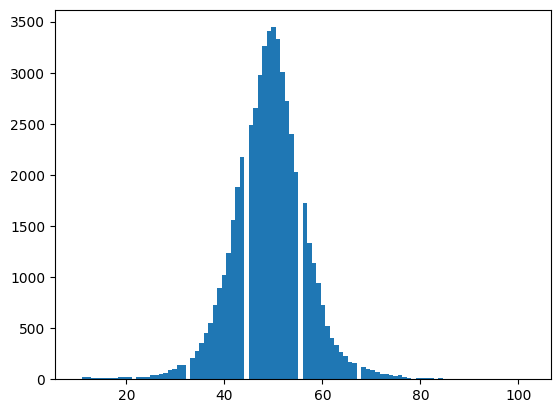

In [20]:
plt.hist(df2['speed'], bins=100)
plt.show()

In [28]:
n_bins = 100
bins = np.histogram(df2['speed'], bins=n_bins)

In [29]:
bins[1]

array([ 10.  ,  10.92,  11.84,  12.76,  13.68,  14.6 ,  15.52,  16.44,
        17.36,  18.28,  19.2 ,  20.12,  21.04,  21.96,  22.88,  23.8 ,
        24.72,  25.64,  26.56,  27.48,  28.4 ,  29.32,  30.24,  31.16,
        32.08,  33.  ,  33.92,  34.84,  35.76,  36.68,  37.6 ,  38.52,
        39.44,  40.36,  41.28,  42.2 ,  43.12,  44.04,  44.96,  45.88,
        46.8 ,  47.72,  48.64,  49.56,  50.48,  51.4 ,  52.32,  53.24,
        54.16,  55.08,  56.  ,  56.92,  57.84,  58.76,  59.68,  60.6 ,
        61.52,  62.44,  63.36,  64.28,  65.2 ,  66.12,  67.04,  67.96,
        68.88,  69.8 ,  70.72,  71.64,  72.56,  73.48,  74.4 ,  75.32,
        76.24,  77.16,  78.08,  79.  ,  79.92,  80.84,  81.76,  82.68,
        83.6 ,  84.52,  85.44,  86.36,  87.28,  88.2 ,  89.12,  90.04,
        90.96,  91.88,  92.8 ,  93.72,  94.64,  95.56,  96.48,  97.4 ,
        98.32,  99.24, 100.16, 101.08, 102.  ])

In [31]:
df_bins = pd.DataFrame({'bin_lower':bins[1][:n_bins], 'bin_upper':bins[1][1:], 'bin_count':bins[0]})
df_bins.to_csv('bins.csv')
df_bins

,bin_lower,bin_upper,bin_count
0,10.00,10.92,1
1,10.92,11.84,18
2,11.84,12.76,22
3,12.76,13.68,15
4,13.68,14.60,12
...,...,...,...
95,97.40,98.32,0
96,98.32,99.24,0
97,99.24,100.16,1
98,100.16,101.08,0


In [32]:
fn = '../data/flightsnyarea.csv'

df = pd.read_csv(fn)
df.head(3)

,aid,dt,flight,squawk,lat,lon,gs,alt_geom,alt_baro,cat,track,nav_heading
0,a88379,2022-12-01 00:00:01.749480,TFF970,1642.0,42.089493,-75.083126,477.5,20850.0,21875,A2,46.8,NaN
1,a28904,2022-12-01 00:00:01.750501,UAL768,1502.0,41.293442,-73.052612,524.5,20375.0,21000,A3,73.2,90.7
2,a3183d,2022-12-01 00:00:01.752463,EDV4767,1755.0,42.316031,-72.285376,557.9,28350.0,29000,A3,35.9,40.8


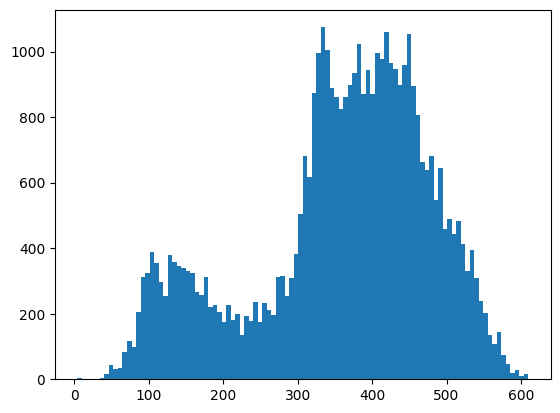

In [33]:
plt.hist(df['gs'], bins=100)
plt.show()

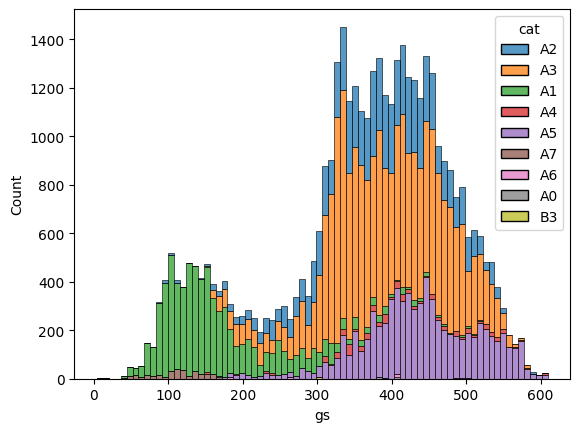

In [35]:
sns.histplot(data=df, x="gs", hue="cat", multiple='stack')
plt.show()

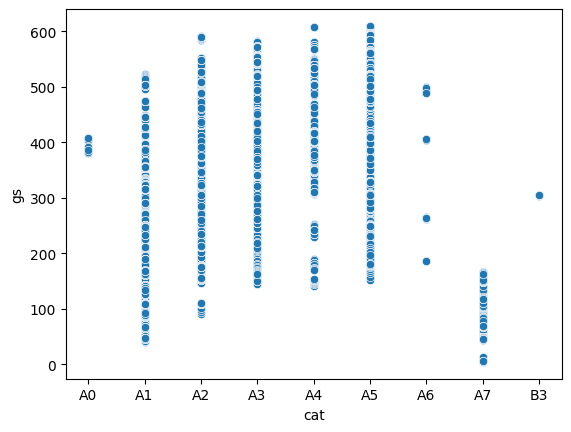

In [36]:
sns.scatterplot(data=df.sort_values('cat'), x='cat', y='gs')
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[["gs", "track", "lat", "lon"]])
scaled_data

array([[ 0.98975115, -1.00506625,  0.79045483, -1.63504533],
       [ 1.38022392, -0.75067636, -0.37905391,  0.29339177],
       [ 1.65770883, -1.11009843,  1.12327041,  1.0220577 ],
       ...,
       [-1.01246031,  1.43380041, -0.66776596,  0.15647415],
       [-0.99750604,  1.43187321, -0.66202604,  0.14786961],
       [-0.99750604,  1.43187321, -0.66202604,  0.14786961]])

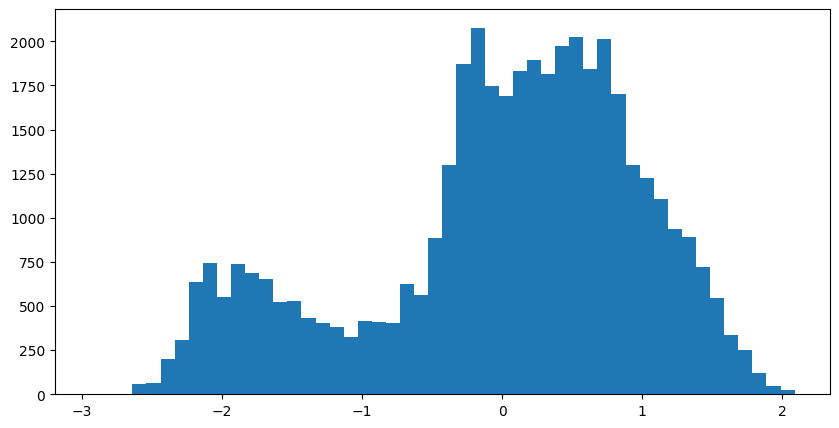

In [38]:
fig = plt.figure(figsize = (10, 5))
plt.hist(scaled_data[:,0],50)
plt.show()

[[0.78157504 0.13003612 0.05824688 0.15348789]
 [0.85917121 0.20338983 0.03705534 0.30619955]
 [0.91431402 0.09974993 0.06427751 0.36390213]
 ...
 [0.38368829 0.83328702 0.03182387 0.29535714]
 [0.38666006 0.83273131 0.03192788 0.29467575]
 [0.38666006 0.83273131 0.03192788 0.29467575]]


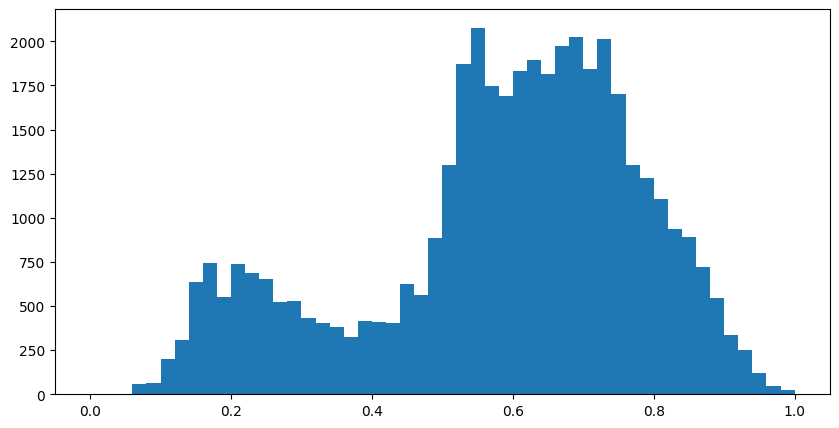

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df[['gs','track','lat','lon']])
print(data_scaled)
fig = plt.figure(figsize = (10, 5))
plt.hist(data_scaled[:,0],50)
plt.show()

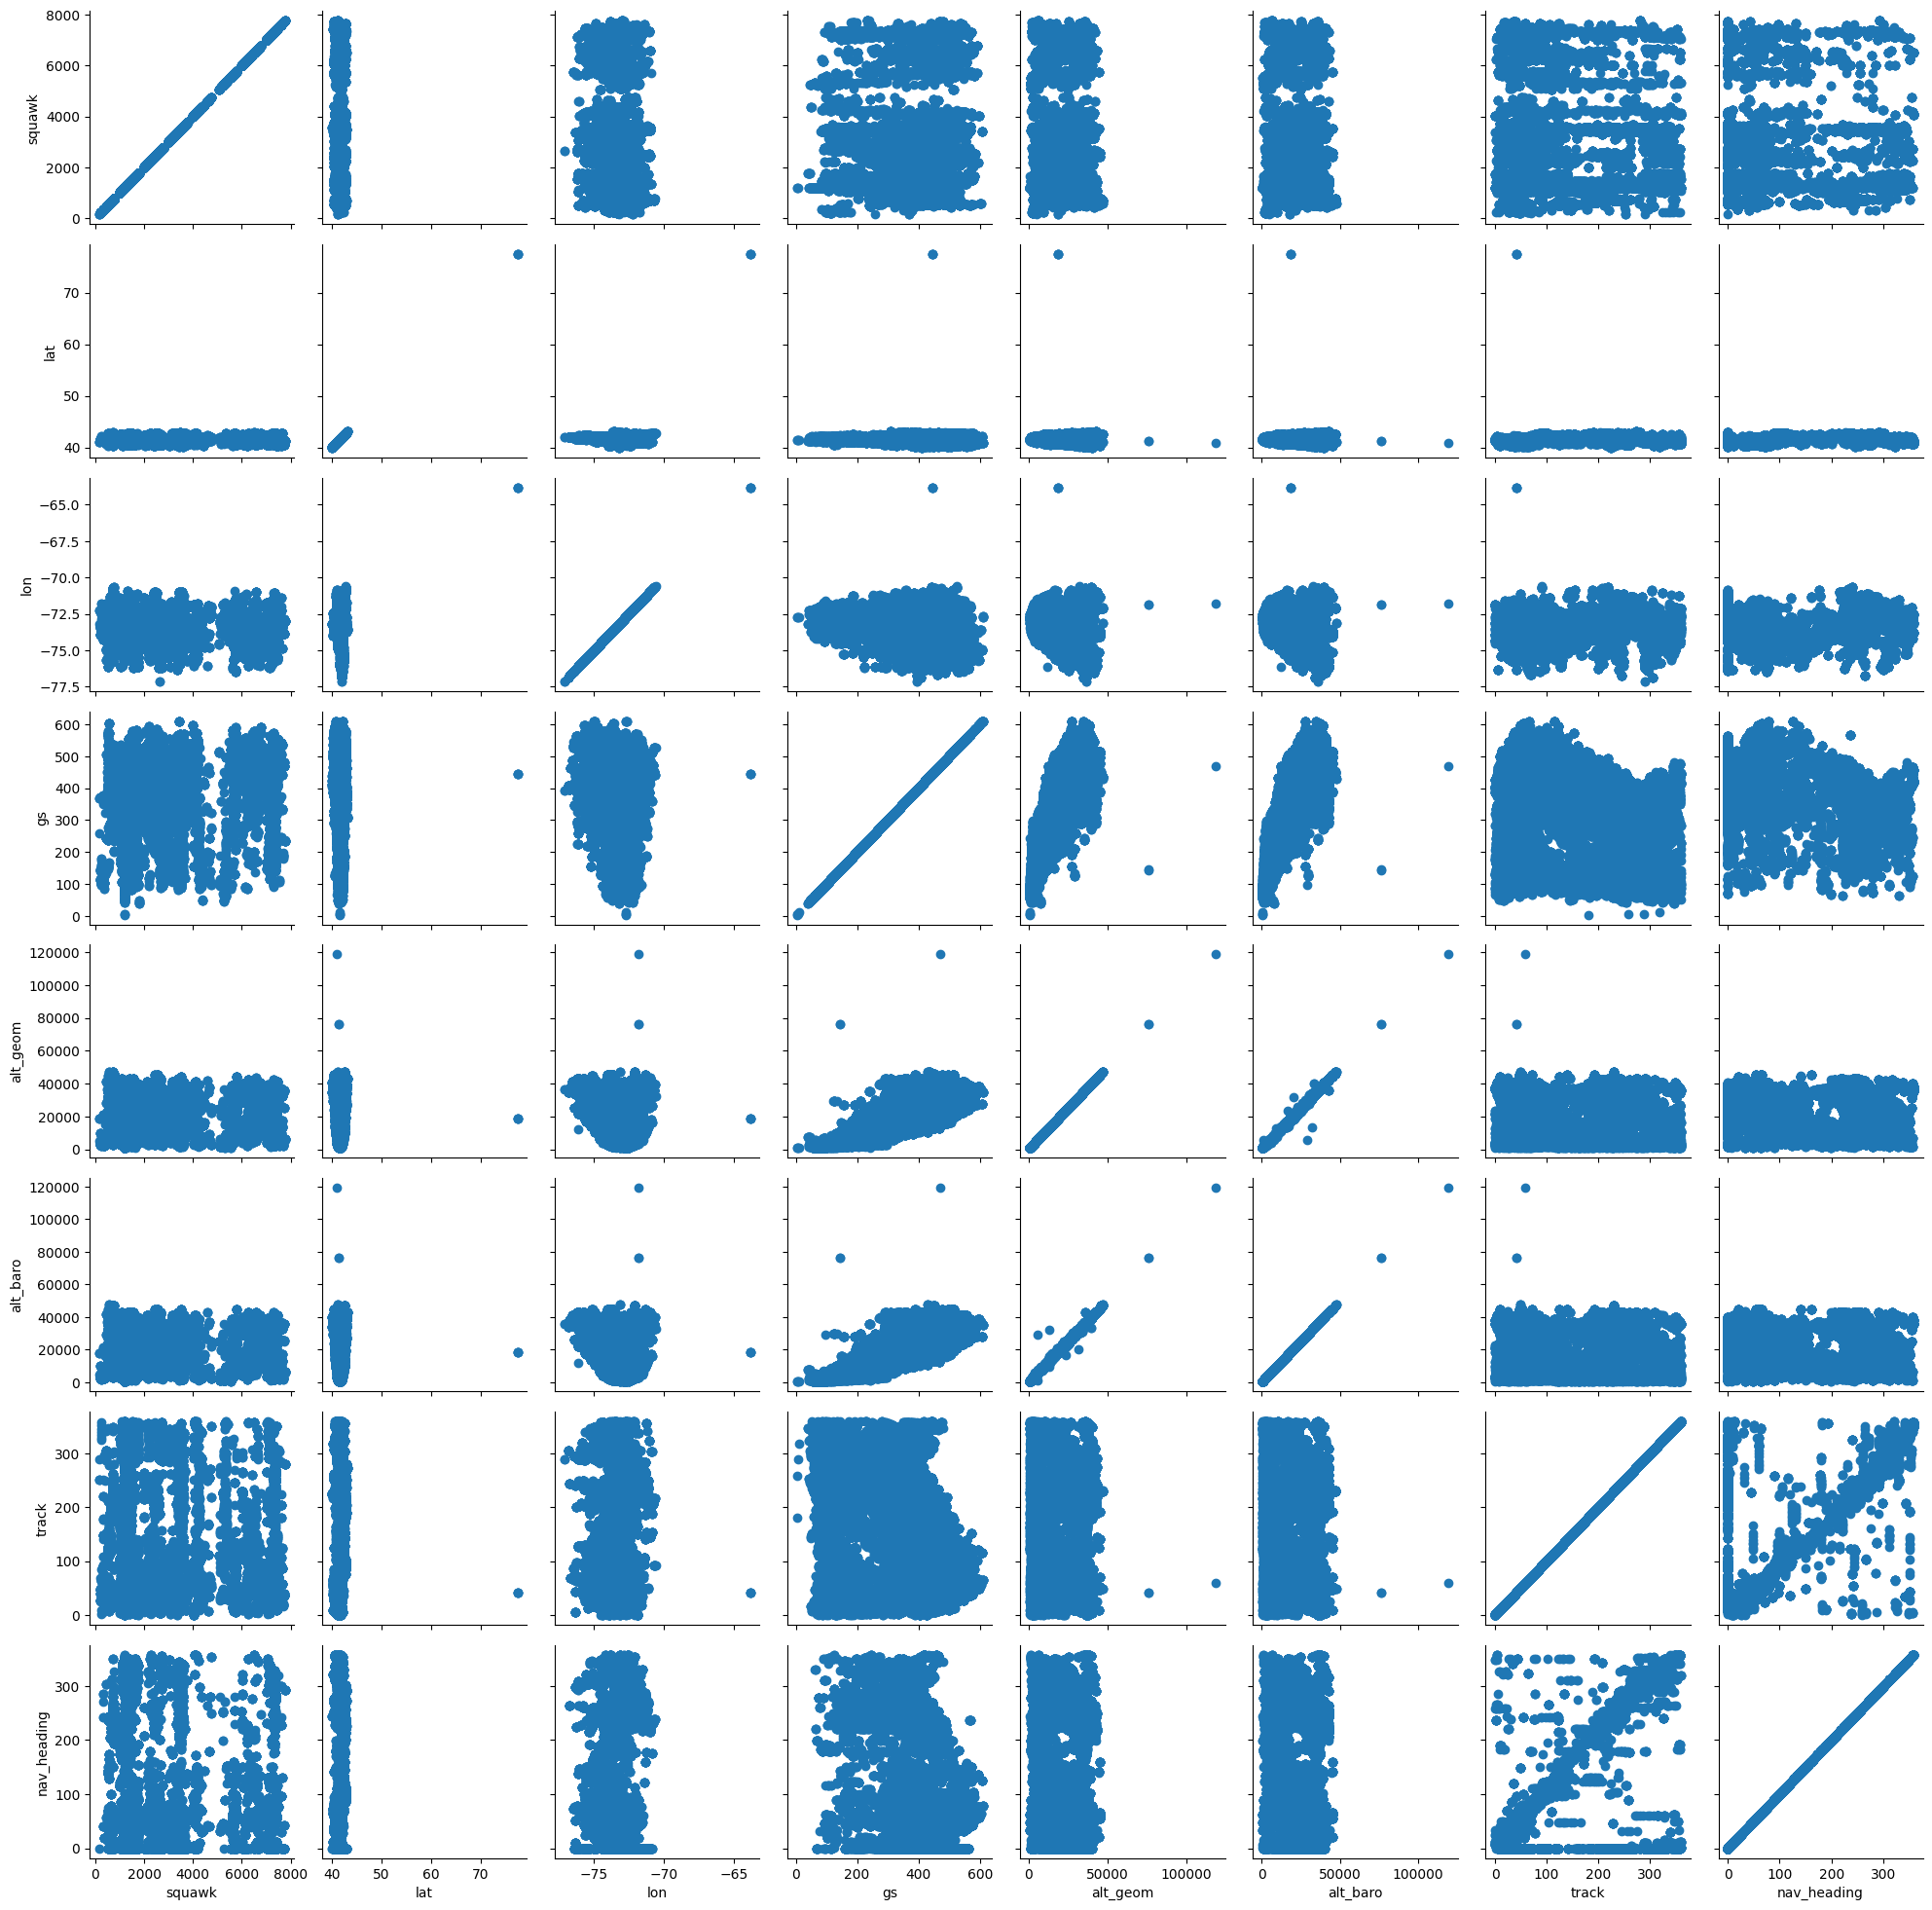

In [40]:
g = sns.PairGrid(df)
g.map(plt.scatter)

In [41]:
# remove outliers outside quantile
df2 = df.copy()
print(df2.shape)
upper = df2['lat'].quantile(.999)
lower = df2['lat'].quantile(.001)
print(lower,upper)

(41843, 12)
40.133840570000004 42.990417


In [42]:
df2 = df2[df2['lat'] < upper]
df2 = df2[df2['lat'] > lower]
df2

,aid,dt,flight,squawk,lat,lon,gs,alt_geom,alt_baro,cat,track,nav_heading
0,a88379,2022-12-01 00:00:01.749480,TFF970,1642.0,42.089493,-75.083126,477.5,20850.0,21875,A2,46.8,NaN
1,a28904,2022-12-01 00:00:01.750501,UAL768,1502.0,41.293442,-73.052612,524.5,20375.0,21000,A3,73.2,90.7
2,a3183d,2022-12-01 00:00:01.752463,EDV4767,1755.0,42.316031,-72.285376,557.9,28350.0,29000,A3,35.9,40.8
3,ac0184,2022-12-01 00:00:01.753534,N873AJ,3430.0,41.588928,-73.549347,198.3,21275.0,22000,A1,219.1,237.7
4,a88379,2022-12-01 00:00:03.777278,TFF970,1642.0,42.089493,-75.083126,477.5,20850.0,21875,A2,46.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
41838,ad677e,2022-12-04 23:58:49.518022,NCR706,NaN,41.095276,-73.193054,236.5,5925.0,6000,A4,299.9,310.1
41839,ad677e,2022-12-04 23:58:51.554235,NCR706,NaN,41.096641,-73.196224,236.5,5925.0,5950,A4,299.9,310.1
41840,ad677e,2022-12-04 23:58:57.640805,NCR706,NaN,41.096924,-73.196777,236.5,5925.0,5925,A4,299.9,310.1
41841,ad677e,2022-12-04 23:58:59.670018,NCR706,NaN,41.100831,-73.205837,238.3,5850.0,5750,A4,299.7,310.1


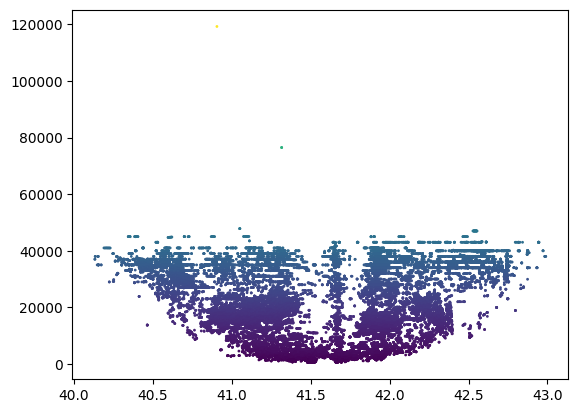

In [43]:
plt.scatter(df2['lat'],df2['alt_baro'],s=1,c=df2['alt_baro'])
plt.show()

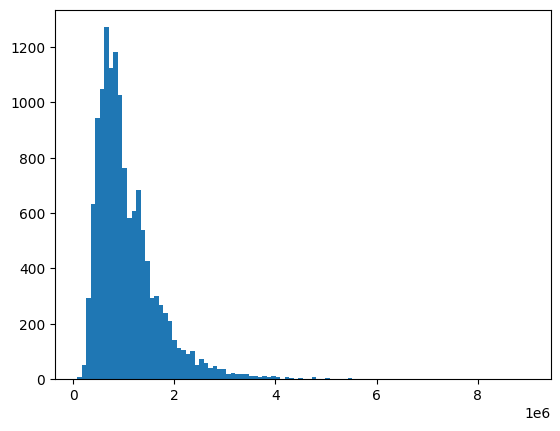

In [44]:
df_housing = pd.read_csv('../data/melb_data.csv')
plt.hist(df_housing['Price'], bins=100)
plt.show()

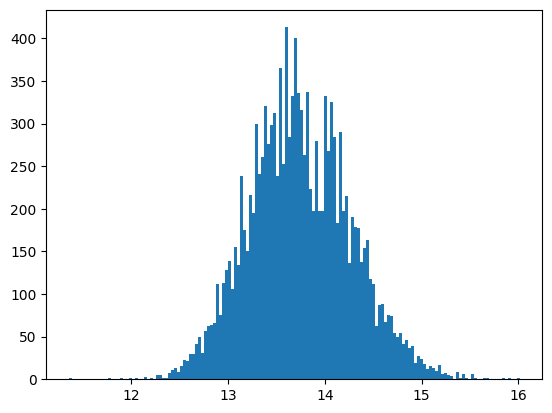

In [46]:
plt.hist(np.log(df_housing['Price']), bins=150)
plt.show()

In [47]:
df_housing_numeric = df_housing.select_dtypes(include=[np.number])
df_housing_numeric

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,7392.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [49]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

df_housing_numeric_imputed_and_scaled = num_pipeline.fit_transform(df_housing_numeric)
df_housing_numeric_imputed_and_scaled

array([[-9.81463370e-01,  6.32448029e-01, -1.30148498e+00, ...,
         1.21159582e-01,  3.06395829e-02, -7.84624806e-01],
       [-9.81463370e-01, -6.36397544e-02, -1.30148498e+00, ...,
         1.64368448e-02, -1.74781777e-02, -7.84624806e-01],
       [ 6.48761311e-02,  6.08984396e-01, -1.30148498e+00, ...,
        -1.22723149e-03, -7.85462560e-03, -7.84624806e-01],
       ...,
       [ 6.48761311e-02,  1.47532944e-01, -5.68760518e-01, ...,
        -5.49318283e-01, -1.03776717e+00, -2.45389260e-01],
       [ 1.11121563e+00,  2.22797508e+00, -5.68760518e-01, ...,
        -6.29311314e-01, -9.83779046e-01, -2.45389260e-01],
       [ 1.11121563e+00,  3.27420798e-01, -6.53961037e-01, ...,
        -3.37796006e-02, -1.06557924e+00, -2.08161223e-01]])